# Latar Belakang

Bank BCA baru saja menerima report data *traffic* penumpang Transjakarta selama bulan Maret 2023. Pada laporan tersebut, produk paycard Bank BCA, Flazz hanya menempati 9% dari *market share*. *Business Analyst* Flazz yang baru ditugaskan untuk meningkatkan *market share* dan retensi penggunaan Flazz pada Transjakarta. Dengan data yang sudah disediakan, *Business Analyst* tersebut diharapkan dapat membuat rekomendasi berdasarkan AARRR(*Acquisition-Activation-Retention-Refferal-Revenue*) *framework* untuk dapat dipresentasikan pada *Marketing Manager* dan Team Marketing Flazz.

# Pernyataan Masalah

*Marketing Manager* tersebut ingin mengetahui gambaran umum demografi market Transjakarta, *strong suit* (kelebihan dibanding kompetitor) Flazz, kelebihan kompetitor yang Flazz belum miliki.
   
Sebagai seorang *Business Analyst* Kita akan menjawab pertanyaan berikut:
*   **Berikan gambaran umum traffic Transjakarta**
*   **Berikan gambaran umum demografi Transjakarta**
*    **Insight mengenai strong suit (kelebihan dibanding kompetitor) Flazz**
*   **Rekomendasi lainnya yang dapat mendukung Acquisition program)**

# Data

Untuk menjawab pertanyaan diatas, kita sebagai Business Analyst akan menggunakan data yang diberikan oleh Transjakarta terlebih dahulu sebelum melakukan market research. Dataset dapat diakes di https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Dataset ini berisi data mengenai detail transaksi yang dilakukan oleh penumpang, alat pembayaran, lokasi dan waktu naik dan turunnya penumpang, biaya yang dibayarkan oleh penumpang. Data berikut dijelaskan dalam 22 kolom berikut:


* transID: ID unik untuk setiap transaksi.
* payCardID: ID unik yang ada pada setiap kartu pembayaran.
* payCardBank: Nama bank pembuat kartu pembayaran.
* payCardName: Nama penumpang yang terdaftar pada kartu pembayaran.
* payCardSex: Jenis kelamin penumpang yang terdaftar pada kartu pembayaran.
* payCardBirthDate: Tahun kelahiran penumpang yang terdaftar pada kartu pembayaran
* corridorID: Nomor ID koridor.
* corridorName: Nama koridor(ditandakan dengan titik awal dan titik akhir).
* direction: 0 untuk tujuan awal ke tujuan akhir, dan 1 untuk arah sebaliknya.
* tapInStops: ID dari stasiun tempat penumpang masuk menaiki Transjakarta.
* tapInStopsName: Nama stasiun dari tempat penumpang masuk menaiki Transjakarta.
* tapInStopsLat: Garis lintang dari lokasi masuk stasiun. 
* tapInStopsLon: Garis bujur dari lokasi masuk stasiun.
* stopStartSeq: Nomor stasiun masuk customer, dihitung dari titik awal bus berangkat.
* tapInTime: Waktu dan tanggal penumpang masuk menaiki Transjakarta.
* tapOutStops: ID dari stasiun tempat penumpang keluar dari Transjakarta.
* tapOutStopsName: Nama dari stasiun tempat penumpang keluar dari Transjakarta.
* tapOutStopsLat: Garis lintang dari lokasi keluar stasiun. 
* tapOutStopsLon: Garis bujur dari lokasi keluar stasiun. 
* stopEndSeq: Nomor stasiun keluar customer, dihitung dari titik tujuan akhir bus.
* tapOutTime: Waktu dan tanggal penumpang keluar Transjakarta.
* payAmount: Jumlah yang dibayarkan penumpang (masih ada rute yang gratis).

Dibawah ini adalah sekilas mengenai isi dataset:

In [6]:
transjakarta=pd.read_csv('Transjakarta(2).csv')
transjakarta

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


# Data Understanding dan Data Cleaning

## Data Understanding

Untuk memulai, kita akan mempelajari terlebih dahulu dataset yang disediakan. Melalui proses ini, kita akan tahu missing values, outlier, data duplikat yang ada pada data dan tindakan apa yang kita ambil untuk mempermudah analisa data nantinya. Setiap tindakan yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

In [7]:
print(f'Jumlah baris dan kolom yang ada pada data ini adalah {transjakarta.shape}')
transjakarta.info()

Jumlah baris dan kolom yang ada pada data ini adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       3561

Data ini memiliki 37900 baris (tidak termasuk column name) dan 22 kolom.
Data ini memiliki 10 kolom yang bersifat numerik, dan 12 bersifat kategorik.

### Data Understanding (Numerik)

In [8]:
transjakarta.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


Dari data description numerik ini, kita dapat melihat bahwa:
* Jumlah yang sesuai antara count dan jumlah baris pada column `payCardID`, `payCardBirthDate`, `direction`, `tapInStopsLat`, `tapInStopsLon`, `stopStartSeq` memungkinkan tidak adanya data yang hilang pada column tersebut
* Adanya data yang menghilang pada `tapOutStopsLat`, `tapOutStopsLon`, `StopEndSeq` dimungkinkan karena tapOut bukanlah untuk pembayaran, melainkan pendataan bagi transjakarta (https://transjakarta.co.id/produk-dan-layanan/info-tiket/). Sehingga mungkin banyak konsumen yang lupa untuk tapout.
* Rata-rata orang yang menaiki Transjakarta lahir pada tahun 1990, dengan mayoritas kelahiran tahun 1982-2001, ini menandakan bahwa Transjakarta populer dalam kalangan usia produktif Indonesia
* Rata-rata penumpang membayar Rp2,699 ini di karenakan mayoritas penumpang hanya perlu mebayara Rp0-Rp3,500 untuk menaikki Transjakarta


### Data Understanding (Kategorik)

In [9]:
transjakarta.describe(exclude='number')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


Dari data description kategorik ini, kita dapat melihat bahwa:
* Jumlah yang sesuai antara count dan jumlah baris pada column `transID`, `payCardBank`, `payCardName`, `payCardSex`, `tapInStopsName`, `tapInTime`] memungkinkan tidak adanya data yang hilang pada column tersebut.
* `corridorID`, `corridorName`, `tapInStops` sepertinya adalah data yang missing at random dikarenakan count data corridorID dan corridorName tidak memiliki jumalh yang sama, dan data tapinStopsName terisi penuh.
* Adanya data yang menghilang pada `tapOutStops`, `tapOutStopsName`, `tapOutTime` dimungkinkan karena tapOut bukanlah untuk pembayaran, melainkan pendataan bagi transjakarta (https://transjakarta.co.id/produk-dan-layanan/info-tiket/). Sehingga mungkin banyak konsumen yang lupa untuk tapout.
* Adanya 6 macam metode pembayaran yang dapat digunakkan, dan yang paling populer adalah DKI
* Transjakarta paling banyak digunakkan oleh Wanita
* Corridor yang paling populer adalah Cibubur-BalaiKota(1T) (https://www.aroengbinang.com/2020/01/rute-transjakarta-royaltrans-cibubur-kota-1t.html)
* Banyak penumpang yang masuk dari Penjaringan(P00170) kemungkinan tingginya lebel aksesbilitas dari stasiun Penjaringan, karena titik ini memungkinkan transfer untuk 7 koridor lainnya
* Banyak penumpang yang kerluar dari BKN, kemungkinan karena adanya banyak gedung pemerintahan dan sekolah (https://id.wikipedia.org/wiki/Halte_Transjakarta_BKN) seperti:
  * Badan Kepegawaian Negara
  * Badan Pembinaan Hukum Nasional
  * Gedung KORPRI
  * Gedung ASABRI
  * SMA Negeri 14 Jakarta 
  * SMK Negeri 10 Jakarta

# Missing Value

## Cek Missing Value

In [10]:
transjakarta.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [11]:
transjakarta.isna().sum()/transjakarta.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

Sesuai dugaan pada data understanding, data yang memiliki count 37900 tidak memiliki missing value, sementara yang kurang dari 37900 memiliki missing value yang tidak signifikan secara persentase mulai dari **2.65%** hingga **6.03%**

<Axes: >

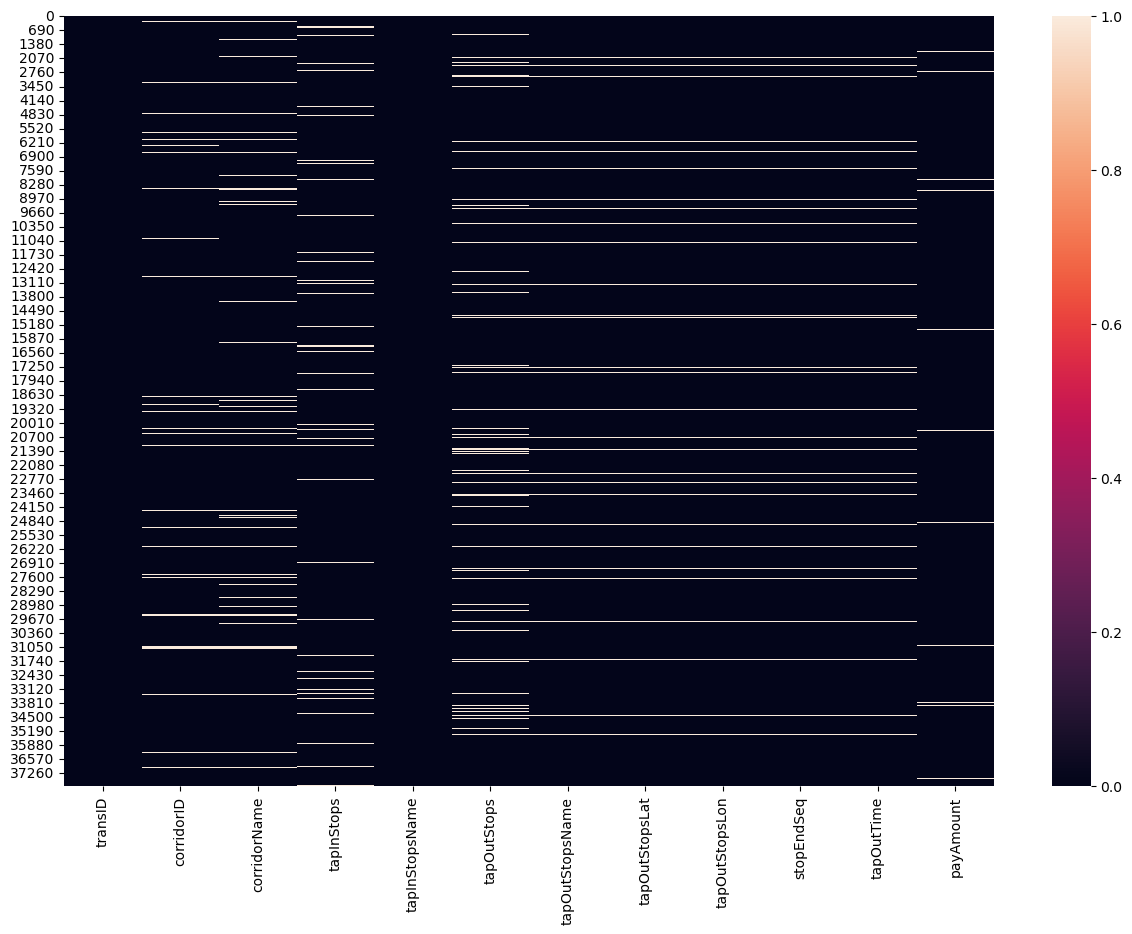

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(transjakarta[['transID','corridorID','corridorName','tapInStops','tapInStopsName','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

Dalam heatmap missing value diatas, dapat dipelajari bahwa:
* `coriddorID`, `corridorName` memiliki beberapa value yang MAR(Missing At Random), yang bisa diisi oleh satu sama lain. Tetapi untuk value yang MNAR(Missing Not At Random), kemungkinan tidak dapat diisi oleh data yang lain.
* kebanyakan data dari `tapInStops` kemungkinan dapat diisi oleh value dari `tapInName`.
* beberapa data dari `tapoutStops` memiliki hubungan dengan `tapoutStopsName`,`tapOutStopsLat`, `tapOutStopsLon`, `StopEndSeq`,`tapOutTime` yang menjadikan 5 dari data pada kolom ini Missing Not At Random. Penyebab banyaknya data hilang ini, dimungkinkan karena tapout bukanlah keharusan untuk dilakukan, krn pemotongan dana hanya dilakukan pada tap in (https://transjakarta.co.id/produk-dan-layanan/info-tiket/)
* payAmount yang MAR, dalam website (https://megapolitan.kompas.com/read/2023/08/12/04000051/tarif-transjakarta-2023) menunjukan bahwa tarif ditentukan berdasarkan waktu penumpang tap in, tetapi hanya ada 3 macam harga dalam data ini berdasarkan koridor yang dinaiki oleh penumpang yaitu
  * Rp 0
  * Rp3,500
  * Rp 20,000

## Mengisi Missing Value

In [13]:
transjakarta.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

### Mengisi TapInStops

In [14]:
# Create a dictionary to map tapInStopsName to tapInStops
tapInStopsName_map = {}
for i in range(len(transjakarta)):
    if not pd.isnull(transjakarta.loc[i, "tapInStops"]):
        tapInStopsName_map[transjakarta.loc[i, "tapInStopsName"]] = transjakarta.loc[i, "tapInStops"]

# Fill in the missing tapInStops
for i in range(len(transjakarta)):
    if pd.isnull(transjakarta.loc[i, "tapInStops"]):
        try:
            transjakarta.loc[i, "tapInStops"] = tapInStopsName_map[transjakarta.loc[i, "tapInStopsName"]]
        except KeyError:
            transjakarta.loc[i, "tapInStops"] = None

# Save the data
transjakarta.to_csv("data_transjakarta9.csv")

In [15]:
transjakarta.tapInStops.isna().sum()

34

### Mengisi TapOutStops

In [16]:
# Create a dictionary to map tapOutStopsName to tapOutStops         
tapOutStopsName_map = {}
for i in range(len(transjakarta)):
    if not pd.isnull(transjakarta.loc[i, "tapOutStops"]):
        tapOutStopsName_map[transjakarta.loc[i, "tapOutStopsName"]] = transjakarta.loc[i, "tapOutStops"]

# Fill in the missing tapInStops
for i in range(len(transjakarta)):
    if pd.isnull(transjakarta.loc[i, "tapOutStops"]):
        try:
            transjakarta.loc[i, "tapOutStops"] = tapOutStopsName_map[transjakarta.loc[i, "tapOutStopsName"]]
        except KeyError:
            transjakarta.loc[i, "tapOutStops"] = None

# Save the data
transjakarta.to_csv("data_transjakarta.csv")

In [17]:
transjakarta.tapOutStops.isna().sum()

1363

### Mengisi CorridorName dan CorridorID

In [18]:
def inverse_mapping(transjakarta):
    # Create a dictionary to map corridorID to corridorName
    CorridorName_map = {}
    for i in range(len(transjakarta)):
        if not pd.isnull(transjakarta.loc[i, "corridorID"]):
            CorridorName_map[transjakarta.loc[i, "corridorID"]] = transjakarta.loc[i, "corridorName"]

    # Fill in the missing corridorName
    for i in range(len(transjakarta)):
        if pd.isnull(transjakarta.loc[i, "corridorName"]):
            transjakarta.loc[i, "corridorName"] = CorridorName_map.get(transjakarta.loc[i, "corridorID"], None)

    return transjakarta


transjakarta = inverse_mapping(transjakarta.copy())

In [19]:
transjakarta.corridorName.isna().sum()

1143

In [20]:
def inverse_mapping(transjakarta):
    # Create a dictionary to map corridorName to corridorID
    CorridorrID_map = {}
    for i in range(len(transjakarta)):
        if not pd.isnull(transjakarta.loc[i, "corridorName"]):
            CorridorrID_map[transjakarta.loc[i, "corridorName"]] = transjakarta.loc[i, "corridorID"]

    # Fill in the missing corridorName
    for i in range(len(transjakarta)):
        if pd.isnull(transjakarta.loc[i, "corridorID"]):
            transjakarta.loc[i, "corridorID"] = CorridorrID_map.get(transjakarta.loc[i, "corridorName"], None)

    return transjakarta


transjakarta = inverse_mapping(transjakarta.copy())

In [21]:
transjakarta.corridorID.isna().sum()

1126

### Mengisi TapOutStops Menggunakan sequence dan corridor name

In [22]:
# Membuat dictionary
Tap_in_out_seq_cor = {}
for i in range(len(transjakarta)):
    key = (transjakarta.loc[i, "tapInStops"], transjakarta.loc[i, "corridorName"], transjakarta.loc[i, "stopStartSeq"])
    value = transjakarta.loc[i, "tapOutStops"]
    Tap_in_out_seq_cor[key] = value

# Mengisi missing value pada tapOutStops
for i in range(len(transjakarta)):
    if transjakarta.loc[i, "tapOutStops"] is None:
        key = (transjakarta.loc[i, "tapInStops"], transjakarta.loc[i, "corridorName"], transjakarta.loc[i, "stopStartSeq"])
        transjakarta.loc[i, "tapOutStops"] = Tap_in_out_seq_cor[key]

# Menyimpan data yang sudah diubah
transjakarta.to_csv("data_transjakarta9.csv")

In [23]:
transjakarta.tapOutStops.isna().sum()

243

### Mengisi Pay Amount

In [24]:
# Create a dictionary to map corridorID to payAmount
payAmout_map = {}
for i in range(len(transjakarta)):
    if not pd.isnull(transjakarta.loc[i, "payAmount"]):
        payAmout_map[transjakarta.loc[i, "corridorID"]] = transjakarta.loc[i, "payAmount"]

# Fill in the missing tapInStops
for i in range(len(transjakarta)):
    if pd.isnull(transjakarta.loc[i, "payAmount"]):
        try:
            transjakarta.loc[i, "payAmount"] = payAmout_map[transjakarta.loc[i, "corridorID"]]
        except KeyError:
            transjakarta.loc[i, "payAmount"] = None

# Save the data
transjakarta.to_csv("data_transjakarta9.csv")

In [25]:
transjakarta.payAmount.isna().sum()

979

### Mengisi TapOuts Name kembali

In [26]:
# Create a dictionary to map tapOutStops to tapOutStopsName         
tapOutStops_map = {}
for i in range(len(transjakarta)):
    if not pd.isnull(transjakarta.loc[i, "tapOutStopsName"]):
        tapOutStops_map[transjakarta.loc[i, "tapOutStops"]] = transjakarta.loc[i, "tapOutStopsName"]

# Fill in the missing tapInStops
for i in range(len(transjakarta)):
    if pd.isnull(transjakarta.loc[i, "tapOutStopsName"]):
        try:
            transjakarta.loc[i, "tapOutStopsName"] = tapOutStops_map[transjakarta.loc[i, "tapOutStops"]]
        except KeyError:
            transjakarta.loc[i, "tapOutStopsName"] = None

# Save the data
transjakarta.to_csv("data_transjakarta.csv")

In [27]:
transjakarta.tapOutStopsName.isna().sum()

0

### Mengisi Long Lad tap Out

In [28]:

##LONG LAD

# Create a dictionary to store the tapOutStopsLon and tapOutStopsLat values
lon_lat_dict = {}

# Loop through the DataFrame
for i in range(len(transjakarta)):
    # Get the tapOutStopsName value
    tapOutStopsName = transjakarta.loc[i, "tapOutStopsName"]

    # Get the tapOutStopsLon and tapOutStopsLat values
    tapOutStopsLon = transjakarta.loc[i, "tapOutStopsLon"]
    tapOutStopsLat = transjakarta.loc[i, "tapOutStopsLat"]

    # Add the values to the dictionary
    lon_lat_dict[tapOutStopsName] = [tapOutStopsLon, tapOutStopsLat]

# Fill the empty values in the DataFrame
for i in range(len(transjakarta)):
    # Get the tapOutStopsName value
    tapOutStopsName = transjakarta.loc[i, "tapOutStopsName"]

    # If the value is empty, fill it with the value from the dictionary
    if pd.isna(transjakarta.loc[i, "tapOutStopsLon"]):
        transjakarta.loc[i, "tapOutStopsLon"] = lon_lat_dict[tapOutStopsName][0]
    if pd.isna(transjakarta.loc[i, "tapOutStopsLat"]):
        transjakarta.loc[i, "tapOutStopsLat"] = lon_lat_dict[tapOutStopsName][1]

# Save the DataFrame to a CSV file
transjakarta.to_csv("data_transjakarta_bersih.csv", index=False)

In [29]:
transjakarta.tapOutStopsLat.isna().sum()



0

In [30]:
transjakarta.tapOutStopsLon.isna().sum()

0

### isi kembali corridorID dan corridor name berdasarkan tapIn dan tap Out dan sequence nya

In [31]:
# Membuat dictionary
Tap_in_out_seq = {}
for i in range(len(transjakarta)):
    key = (transjakarta.loc[i, "tapInStops"], transjakarta.loc[i, "tapOutStops"], transjakarta.loc[i, "stopStartSeq"])
    value = transjakarta.loc[i, "corridorID"]
    Tap_in_out_seq[key] = value

# Mengisi missing value pada corridorID
for i in range(len(transjakarta)):
    if transjakarta.loc[i, "corridorID"] is None:
        key = (transjakarta.loc[i, "tapInStops"], transjakarta.loc[i, "tapOutStops"], transjakarta.loc[i, "stopStartSeq"])
        transjakarta.loc[i, "corridorID"] = Tap_in_out_seq[key]

# Menyimpan data yang sudah diubah
transjakarta.to_csv("data_transjakarta9.csv")

In [32]:
transjakarta.corridorID.isna().sum()

208

In [33]:
def inverse_mapping(transjakarta):
    # Create a dictionary to map corridorID to corridorName
    CorridorName_map = {}
    for i in range(len(transjakarta)):
        if not pd.isnull(transjakarta.loc[i, "corridorID"]):
            CorridorName_map[transjakarta.loc[i, "corridorID"]] = transjakarta.loc[i, "corridorName"]

    # Fill in the missing corridorName
    for i in range(len(transjakarta)):
        if pd.isnull(transjakarta.loc[i, "corridorName"]):
            transjakarta.loc[i, "corridorName"] = CorridorName_map.get(transjakarta.loc[i, "corridorID"], None)

    return transjakarta


transjakarta = inverse_mapping(transjakarta.copy())

In [34]:
transjakarta.corridorName.isna().sum()

247

# 

#### isi kembali tapOutStops dan tapOutStopsName kembali berdasarkan stopStartSeq dan corridorName

In [35]:
# Membuat dictionary
Tap_in_out_seq_cor = {}
for i in range(len(transjakarta)):
    key = (transjakarta.loc[i, "tapInStopsName"], transjakarta.loc[i, "corridorName"], transjakarta.loc[i, "stopStartSeq"])
    value = transjakarta.loc[i, "tapOutStopsName"]
    Tap_in_out_seq_cor[key] = value

# Mengisi missing value pada tapOutStops
for i in range(len(transjakarta)):
    if transjakarta.loc[i, "tapOutStopsName"] is None:
        key = (transjakarta.loc[i, "tapInStopsName"], transjakarta.loc[i, "corridorName"], transjakarta.loc[i, "stopStartSeq"])
        transjakarta.loc[i, "tapOutStopsName"] = Tap_in_out_seq_cor[key]

# Menyimpan data yang sudah diubah
transjakarta.to_csv("data_transjakarta9.csv")

In [36]:
transjakarta.tapOutStopsName.isna().sum()

0

In [37]:
# Create a dictionary to map tapOutStopsName to tapOutStops         
tapOutStopsName_map = {}
for i in range(len(transjakarta)):
    if not pd.isnull(transjakarta.loc[i, "tapOutStops"]):
        tapOutStopsName_map[transjakarta.loc[i, "tapOutStopsName"]] = transjakarta.loc[i, "tapOutStops"]

# Fill in the missing tapInStops
for i in range(len(transjakarta)):
    if pd.isnull(transjakarta.loc[i, "tapOutStops"]):
        try:
            transjakarta.loc[i, "tapOutStops"] = tapOutStopsName_map[transjakarta.loc[i, "tapOutStopsName"]]
        except KeyError:
            transjakarta.loc[i, "tapOutStops"] = None

# Save the data
transjakarta.to_csv("data_transjakarta9.csv")

In [38]:
transjakarta.tapOutStops.isna().sum()

243

### coba hitung stop end seq berdasarkan corridor dan tap in

In [39]:
# Membuat dictionary
stopEnd_seq_cor = {}
for i in range(len(transjakarta)):
    key =  (transjakarta.loc[i, "corridorName"], transjakarta.loc[i, "tapOutStopsName"])
    value = transjakarta.loc[i, "stopEndSeq"]
    stopEnd_seq_cor[key] = value

# Mengisi missing value pada tapOutStops
for i in range(len(transjakarta)):
    if transjakarta.loc[i, "stopEndSeq"] is None:
        key = (transjakarta.loc[i, "corridorName"], transjakarta.loc[i, "tapOutStopsName"])
        transjakarta.loc[i, "stopEndSeq"] = stopEnd_seq_cor[key]

# Menyimpan data yang sudah diubah
transjakarta.to_csv("data_transjakarta.csv")

In [40]:
transjakarta.stopEndSeq.isna().sum()

1344

# isi ulang payAmount

In [41]:
# Create a dictionary to map corridorName to payAmount
payAmout_Name_map = {}
for i in range(len(transjakarta)):
    if not pd.isnull(transjakarta.loc[i, "payAmount"]):
        payAmout_map[transjakarta.loc[i, "corridorName"]] = transjakarta.loc[i, "payAmount"]

# Fill in the missing tapInStops
for i in range(len(transjakarta)):
    if pd.isnull(transjakarta.loc[i, "payAmount"]):
        try:
            transjakarta.loc[i, "payAmount"] = payAmout_map[transjakarta.loc[i, "corridorName"]]
        except KeyError:
            transjakarta.loc[i, "payAmount"] = None

# Save the data
transjakarta.to_csv("data_transjakarta.csv")

In [42]:
transjakarta.payAmount.isna().sum()

0

# Cek Kembali Missing Value setelah Pengisian 

<Axes: >

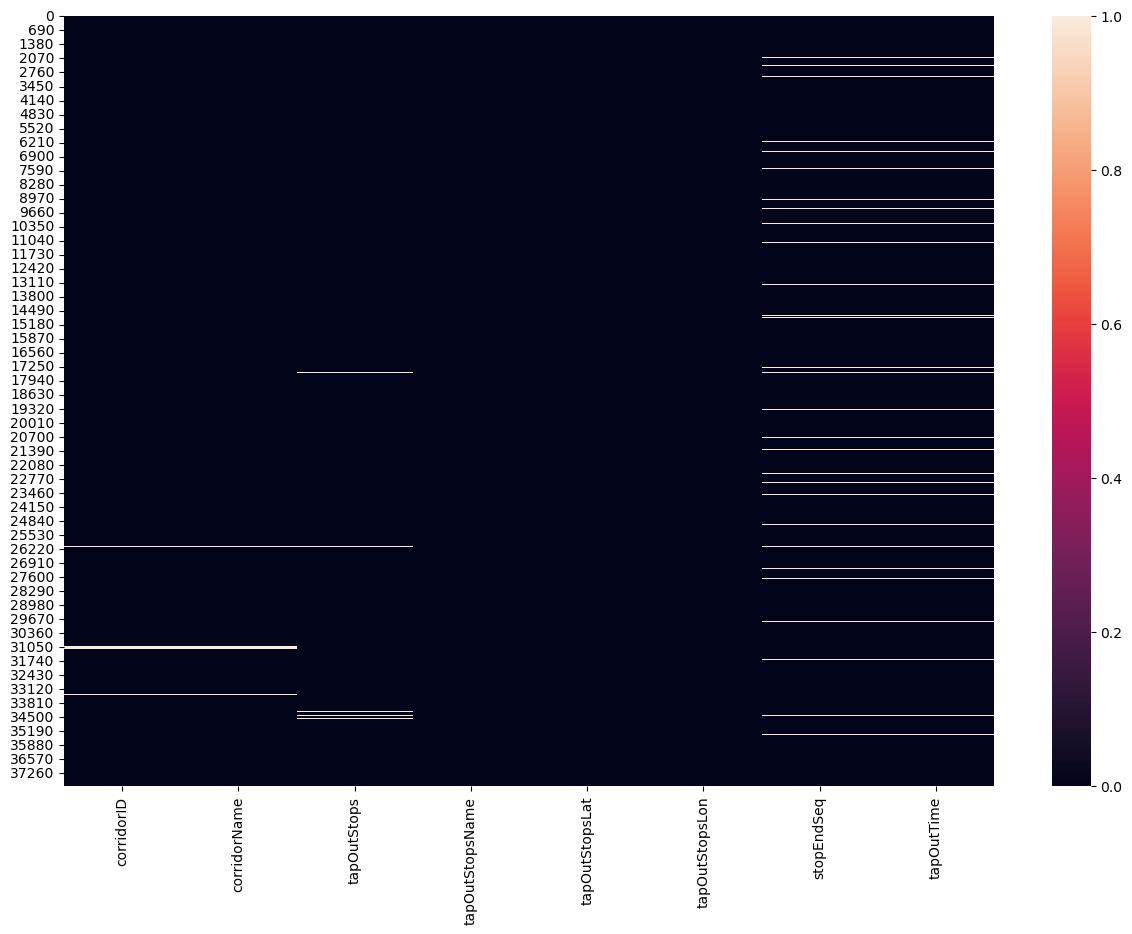

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(transjakarta[['corridorID','corridorName','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime']].isna())

In [44]:
transjakarta.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID           208
corridorName         247
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops          243
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq          1344
tapOutTime          1344
payAmount              0
dtype: int64

In [45]:
transjakarta.isna().sum()/transjakarta.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          0.548813
corridorName        0.651715
direction           0.000000
tapInStops          0.089710
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         0.641161
tapOutStopsName     0.000000
tapOutStopsLat      0.000000
tapOutStopsLon      0.000000
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           0.000000
dtype: float64

dari 0.08% hingga 3.54% missing value

* mengisi denngan unknown: corridorName,tapOutStopsName
* mengisi dengan angka "0": corridorID, ,tapOutStops, tapOutStopsLat, tapOutStopsLon


# mengisi denngan unknown: corridorName,tapOutStopsName

data-data ini terlalu berharga untuk di drop dan bila diisi dengan modus/median/mean akan merusak data, oleh karena itu kita isi dengan unknown

In [46]:
# Fill missing values with unknown
transjakarta['corridorName'].fillna('Unknown', inplace=True)
transjakarta['tapOutStopsName'].fillna('Unknown', inplace=True)

transjakarta.to_csv("data_transjakarta_bersih.csv")

In [47]:
print(f"Missing Value corridorName: {transjakarta.corridorName.isna().sum()}")
print(f"Missing Value tapOutStopsName: {transjakarta.tapOutStopsName.isna().sum()}")

Missing Value corridorName: 0
Missing Value tapOutStopsName: 0


# mengisi dengan angka "0": corridorID, ,tapOutStops, tapOutStopsLat, tapOutStopsLon

data-data ini terlalu berharga untuk di drop dan bila diisi dengan modus/median/mean akan merusak data,oleh karena itu diisi dengan angka "0"

In [61]:
# Fill missing values with unknown
transjakarta['corridorID'].fillna('0', inplace=True)
transjakarta['tapInStops'].fillna('0', inplace=True)
transjakarta['tapOutStops'].fillna('0', inplace=True)
transjakarta['stopEndSeq'].fillna('0', inplace=True)


transjakarta.to_csv("data_transjakarta_bersih.csv")

In [62]:
print(f"Missing Value corridorID: {transjakarta.corridorID.isna().sum()}")
print(f"Missing Value tapInStops: {transjakarta.tapInStops.isna().sum()}")
print(f"Missing Value tapOutStops: {transjakarta.tapOutStops.isna().sum()}")

print(f"Missing Value stopEndSeq: {transjakarta.tapOutStopsLon.isna().sum()}")

Missing Value corridorID: 0
Missing Value tapInStops: 0
Missing Value tapOutStops: 0
Missing Value stopEndSeq: 0


# mengisi dengan rata2 hasil pengurangan tapOutStops time dan tapInTime

In [50]:
# Mengubah data tapOutTime dan tapInTime
transjakarta["tapOutTime"] = pd.to_datetime(transjakarta["tapOutTime"])
transjakarta["tapInTime"] = pd.to_datetime(transjakarta["tapInTime"])

# Mencari data tapOutTime yang tidak missing value
transjakarta1 = transjakarta[transjakarta["tapOutTime"].notna()]

# Menghitung rata-rata pengurangan tapOutTime dan tapInTime
rata_rata = (transjakarta1["tapOutTime"] - transjakarta["tapInTime"]).mean()

# Mengisi tapOutTime yang missing value
transjakarta["tapOutTime"].fillna (transjakarta["tapInTime"]+rata_rata,inplace=True)

# Menyimpan data
transjakarta.to_csv("data_transjakarta.csv")

In [51]:
print(f"Missing Value stopEndSeq: {transjakarta.tapOutTime.isna().sum()}")

Missing Value stopEndSeq: 0


# Handling Outliers&Statistik Deskriptif

In [52]:
 transjakarta.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214781,106.841286,2643.773087
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.058852,0.060838,4175.157439
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.246441,106.801870,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214979,106.834890,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.175269,106.882880,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,20000.000000


In [53]:
transjakarta.describe(exclude='number')

C:\Users\rosa\AppData\Local\Temp\ipykernel_27856\1170837170.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transjakarta.describe(exclude='number')
C:\Users\rosa\AppData\Local\Temp\ipykernel_27856\1170837170.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transjakarta.describe(exclude='number')


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,stopEndSeq,tapOutTime
count,37900,37900,37900,37900,37900,37900,37900,37900,37900,37900,37900,37900.0,37900
unique,37900,6,1993,2,222,217,2571,2602,37079,2231,2248,75.0,37252
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,12.0,2023-04-18 07:24:15
freq,1,18743,80,20157,410,410,243,243,3,322,322,1462.0,3
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-01 06:22:27,NaN,NaN,NaN,2023-04-01 07:27:31
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-30 21:55:41,NaN,NaN,NaN,2023-04-30 23:23:18


Tidak ada perubahan signifikan setelah pembersihan data

## Numerik 

In [54]:
numerik=transjakarta[['tapInTime', 'tapOutTime', 'stopEndSeq', 'payAmount']]

In [55]:
numerik.columns

Index(['tapInTime', 'tapOutTime', 'stopEndSeq', 'payAmount'], dtype='object')

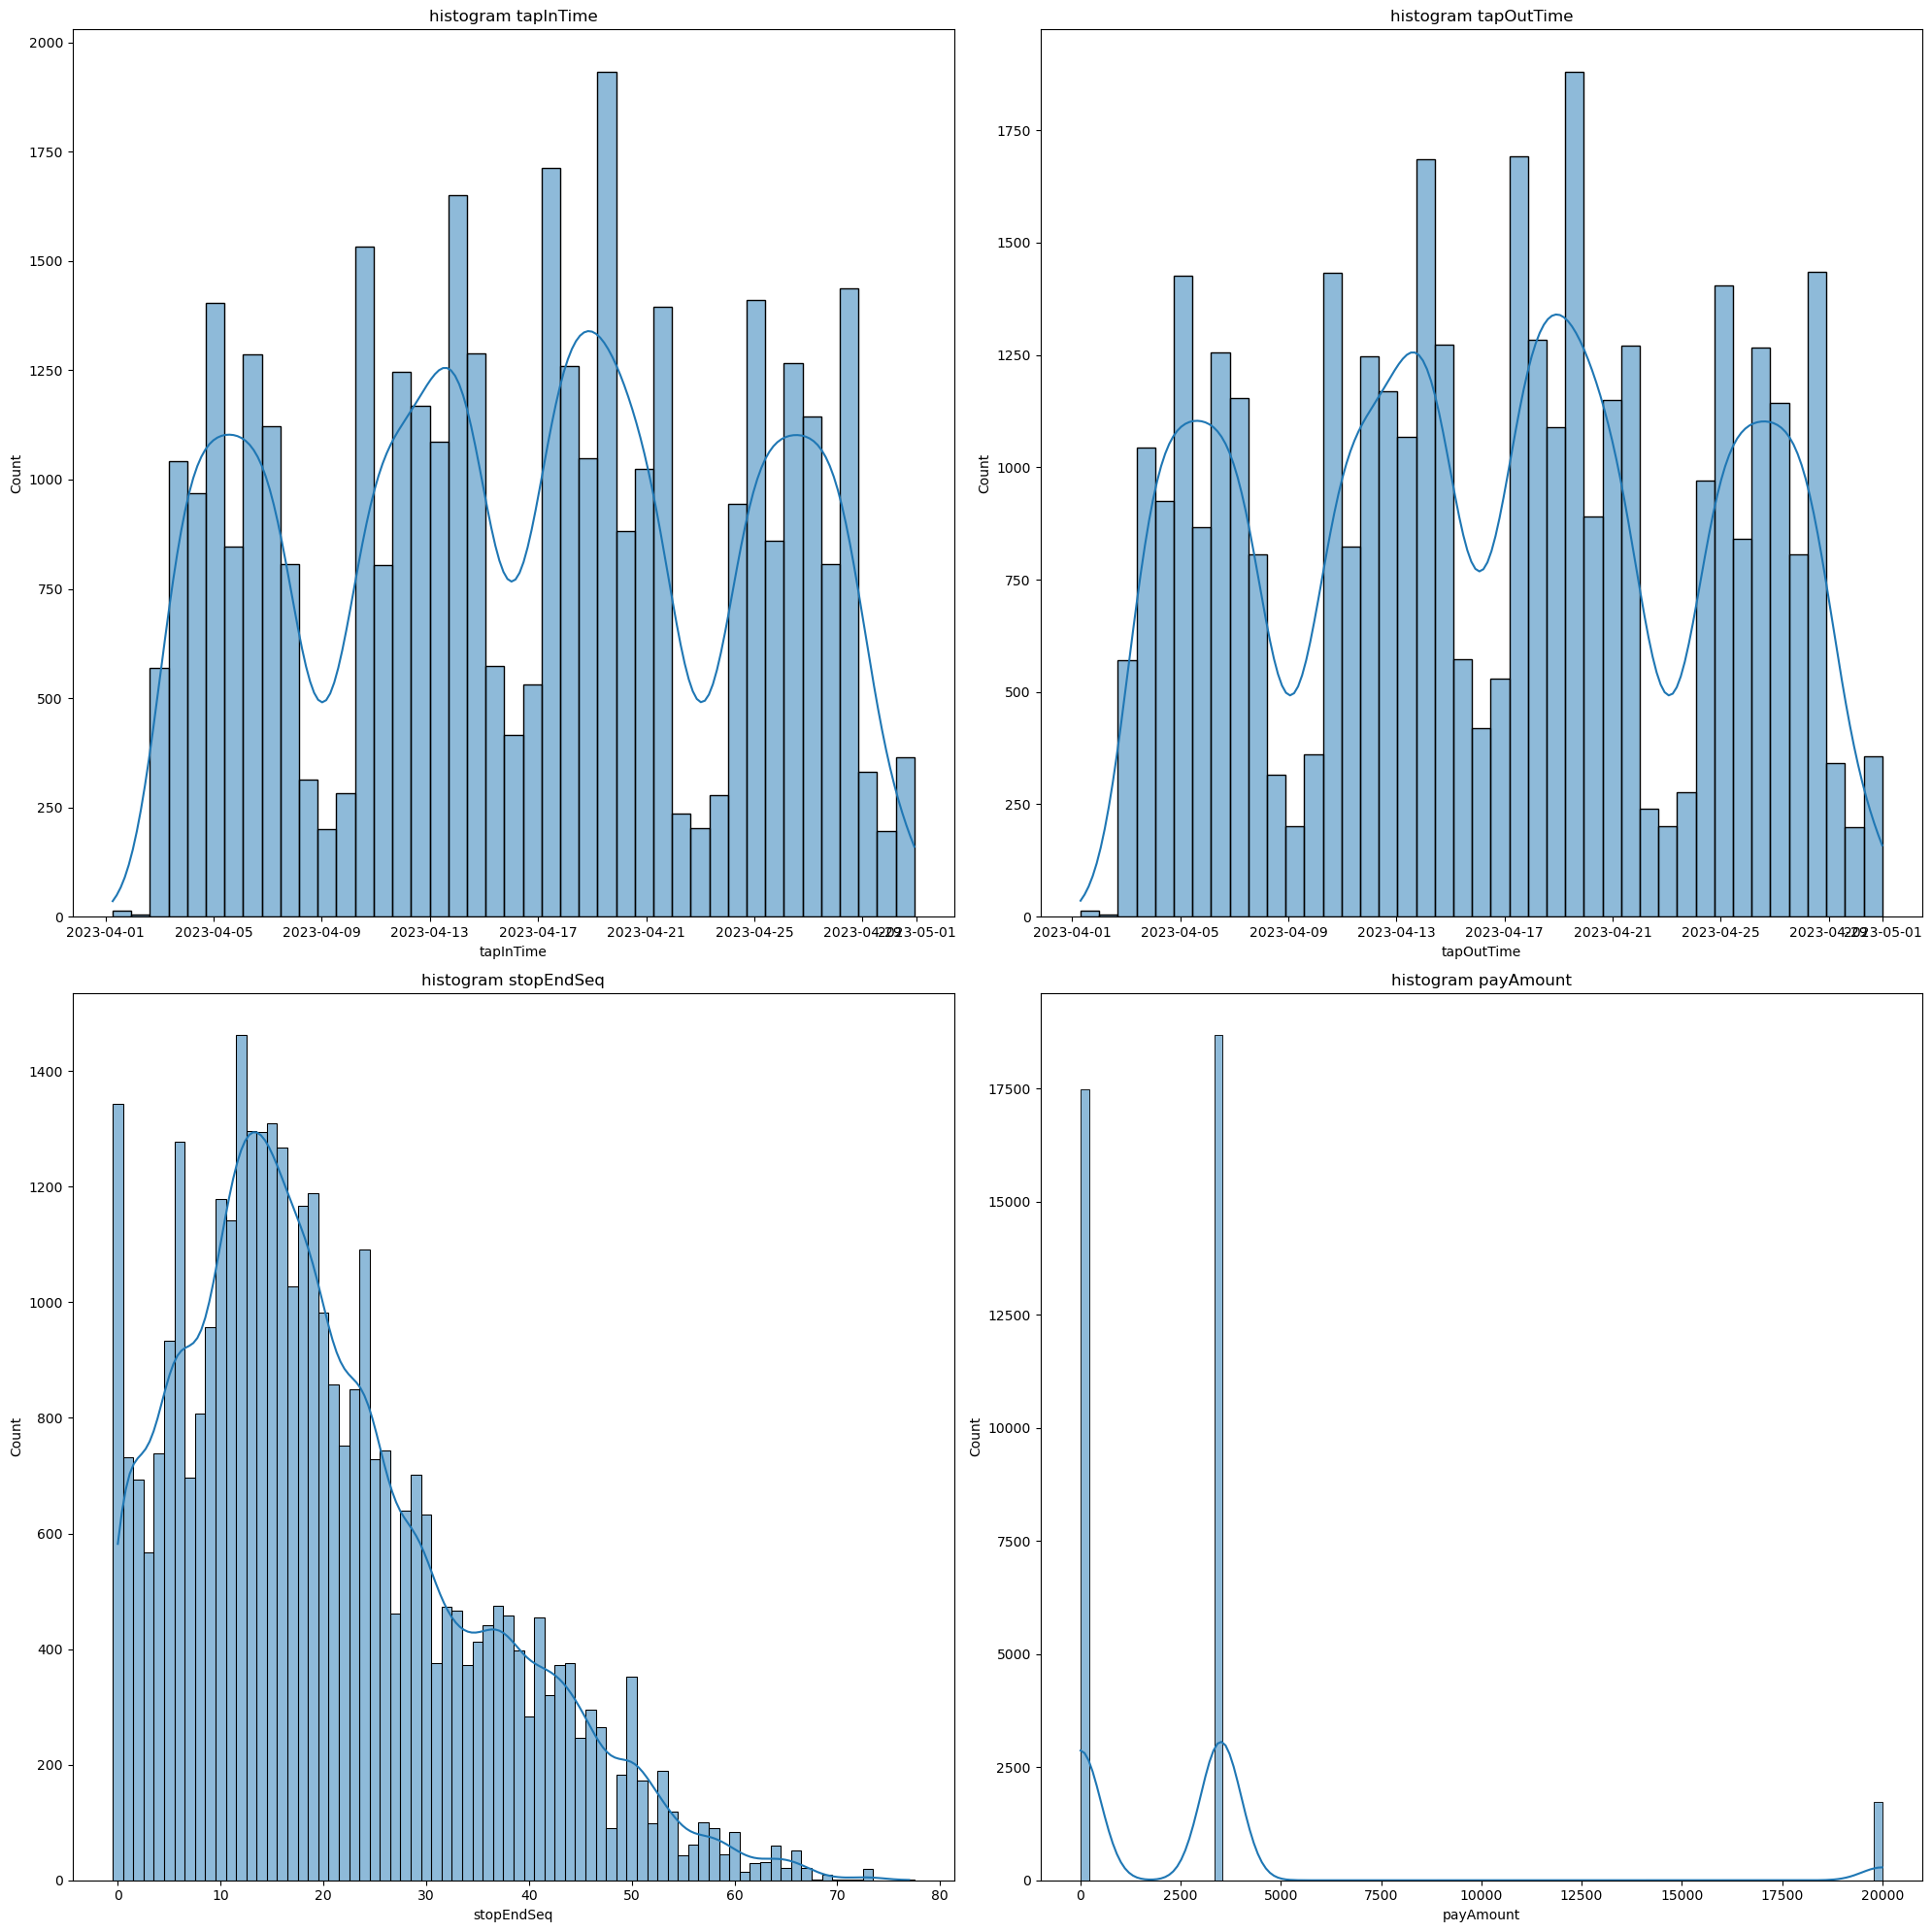

In [56]:
fig=plt.figure(figsize=(20,20))

count=0
for kolom in numerik.columns:
    count+=1
    plt.subplot(2,2,count)
    sns.histplot(numerik[kolom],kde=True)
    plt.title(f"histogram {kolom}")
    fig.tight_layout()
plt.show()

melalui data ini dapat dilihat bahwa persebaran data nya memang tidak normal, tetapi data ini tidak perlu ada yang dibuang outliers nya untuk menjaga keakuratan data

## Kategorik 

In [57]:
kategorik=transjakarta[['payCardBank', 'payCardName', 'payCardSex']] 

In [58]:
numerik.columns

Index(['tapInTime', 'tapOutTime', 'stopEndSeq', 'payAmount'], dtype='object')

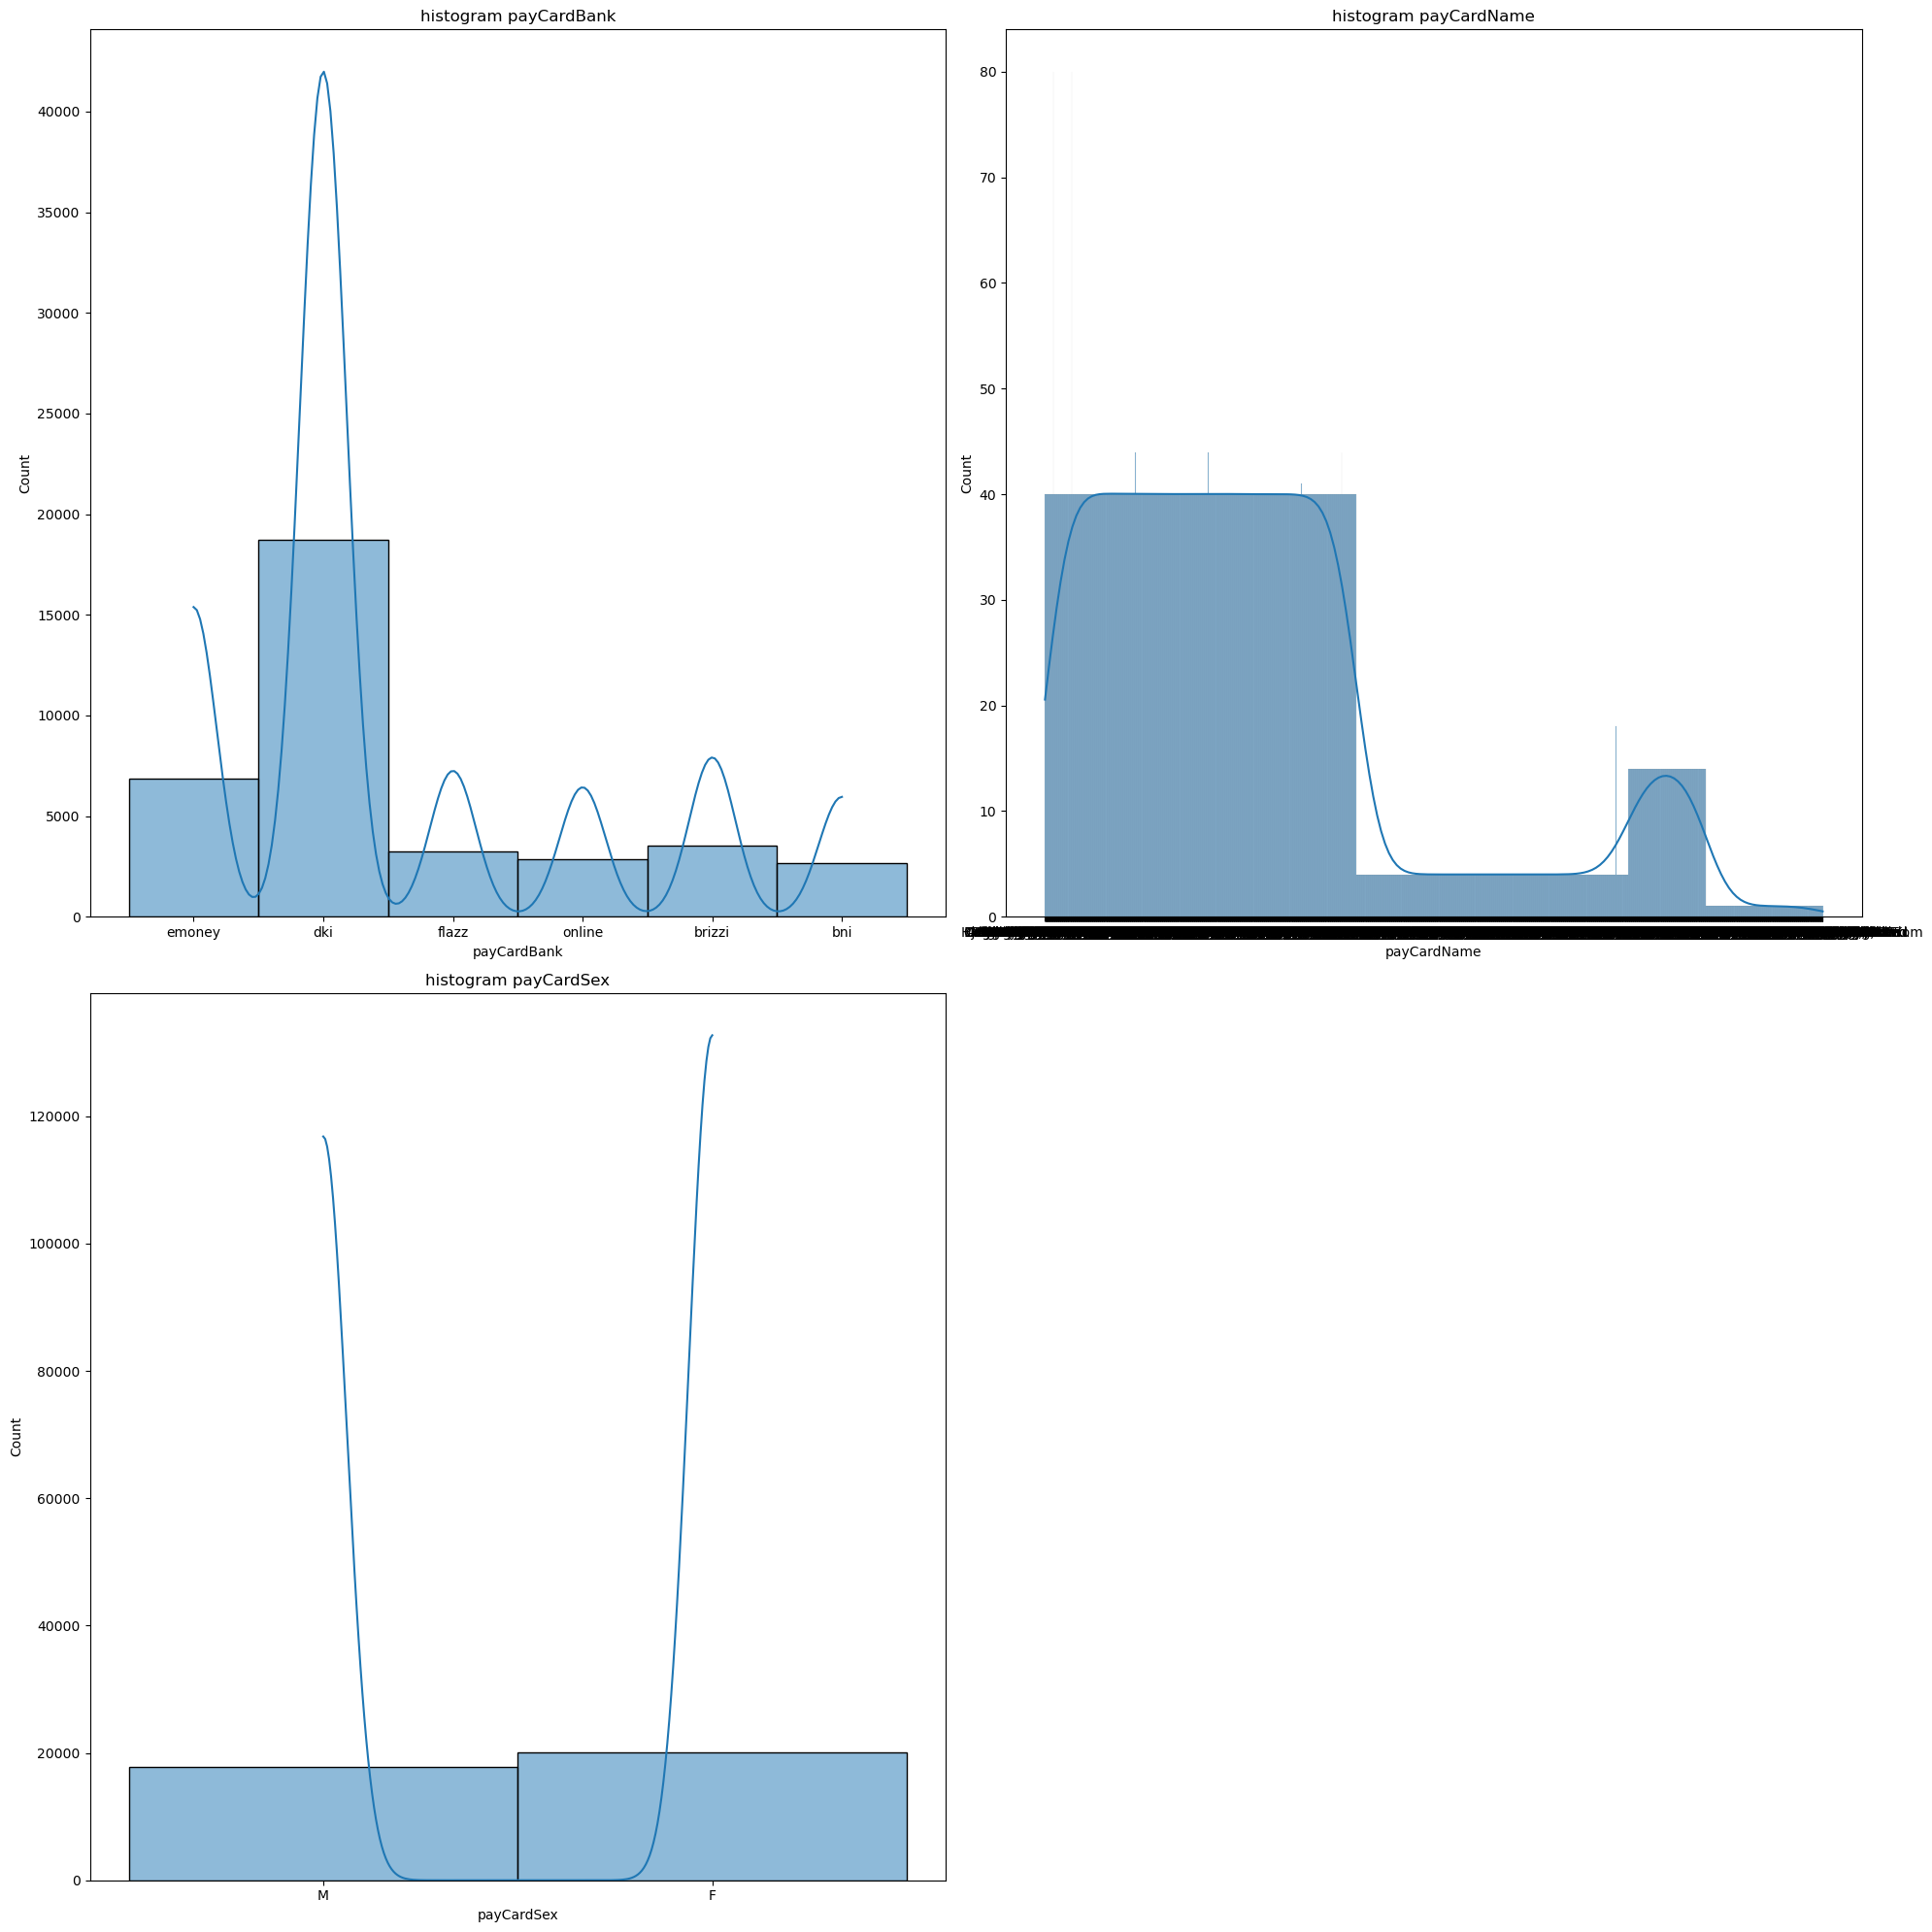

In [59]:
fig=plt.figure(figsize=(20,20))

count=0
for kolom in kategorik.columns:
    count+=1
    plt.subplot(2,2,count)
    sns.histplot(kategorik[kolom],kde=True)
    plt.title(f"histogram {kolom}")
    fig.tight_layout()
plt.show()

data kategorik ini dapat dilihat bahwa persebaran data nya memang tidak normal, tetapi data ini tidak perlu ada yang dibuang outliers nya untuk menjaga keakuratan data

# Melihat kembali data 

In [65]:
listItem = []
for col in transjakarta.columns :
    listItem.append([col, transjakarta[col].dtype, transjakarta[col].isna().sum(),
                    transjakarta[col].nunique(), list(transjakarta[col].drop_duplicates().sample(2).values)]);

transjakartaDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(transjakarta.shape)
transjakartaDesc

(37900, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,37900,"[XWGR708H7R69QZ, QOTN687I1B81RK]"
1,payCardID,int64,0,2000,"[180080234589061, 6011412805910941]"
2,payCardBank,object,0,6,"[flazz, brizzi]"
3,payCardName,object,0,1993,"[dr. Kamaria Najmudin, Rahmi Haryanto]"
4,payCardSex,object,0,2,"[M, F]"
5,payCardBirthDate,int64,0,67,"[1978, 1951]"
6,corridorID,object,0,222,"[JAK.44, JAK.45]"
7,corridorName,object,0,217,"[Kampung Rambutan - Blok M, Rusun Flamboyan - ..."
8,direction,float64,0,2,"[0.0, 1.0]"
9,tapInStops,object,0,2571,"[B03090P, B02378P]"


data sekarang sudah bersih dan siap untuk dianalisis

# Data Analysis

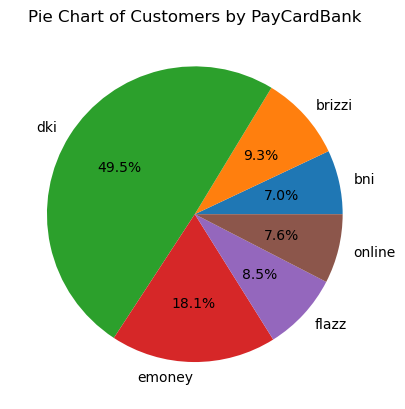

In [66]:

count = transjakarta.groupby(['payCardBank'])['transID'].count()

pie_chart_slice_labels = count.index.to_numpy()


pie_chart_slice_labels[15:] = ''


pie_chart_slice_values = count.to_numpy()


plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Pie Chart of Customers by PayCardBank")
plt.show()

flazz masih menempati urutan keempat dalam channel pembayaran

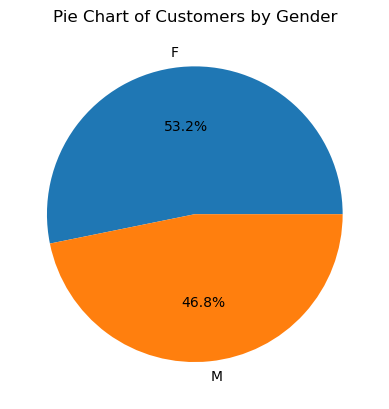

In [68]:

count = transjakarta.groupby(['payCardSex'])['transID'].count()


pie_chart_slice_labels = count.index.to_numpy()


pie_chart_slice_labels[15:] = ''


pie_chart_slice_values = count.to_numpy()


plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Pie Chart of Customers by Gender")
plt.show()

female adalah pengguna terbanyak transjakarta

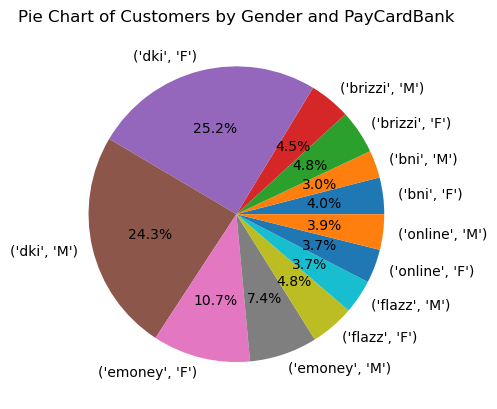

In [69]:
# Calculate the number of customers for each gender and payCardBank combination
count = transjakarta.groupby(['payCardBank', 'payCardSex'])['payCardSex'].count()

# Get the pie chart slice labels
pie_chart_slice_labels = count.index.to_numpy()

# Remove slice labels beyond the top 15 to avoid labels overlapping
pie_chart_slice_labels[15:] = ''

# Get the pie chart slice values
pie_chart_slice_values = count.to_numpy()

# Create a pie chart of the number of customers for each gender and payCardBank combination
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Pie Chart of Customers by Gender and PayCardBank")
plt.show()

female adalah pengguna terbanyak transjakarta

In [70]:

df_count = transjakarta.groupby("payCardBirthDate").size()


df_count = df_count.sort_values(ascending=False)


top_5_count = df_count.head(5)


print(top_5_count)

payCardBirthDate
1992    1394
1981    1381
1994    1355
1987    1291
1985    1251
dtype: int64


Berdasarkan jumlah transaksi, pengguna terbanyak adalah yang berumur21-42 tahun

In [74]:

df_count = transjakarta.groupby("tapInStopsName").size()


df_count = df_count.sort_values(ascending=False)


top_5_count = df_count.head(5)


print(top_5_count)

tapInStopsName
Penjaringan          243
Garuda Taman Mini    208
BKN                  173
BNN LRT              155
Pejaten              152
dtype: int64


tapInStops yang populer dapat digunakan sebagai lokasi offline campaign

In [72]:

df_count = transjakarta.groupby("tapOutStopsName").size()


df_count = df_count.sort_values(ascending=False)


top_5_count = df_count.head(5)


print(top_5_count)

tapOutStopsName
BKN                           322
Penjaringan                   272
Gg. Trijaya IV Tebet Timur    226
Term. Senen                   200
Monas                         167
dtype: int64


tapOutStop hanya dapat kita gunakan sebagai pengetahuan, karena kebanyakan oranga akan membeli sesuatu ketika mereka membutuhkannya, bukan ketika mereka sudah selesai menggunakannya

In [73]:

df_count = transjakarta.groupby("payAmount").size()


df_count = df_count.sort_values(ascending=False)


top_5_count = df_count.head(5)


print(top_5_count)

payAmount
3500.0     18674
0.0        17484
20000.0     1742
dtype: int64


corridor yang populer digunakan adalah yang berharga 0 hingga 3500

# Recommendation

Kita dapat melakukan 3 macam acquisition marketing program

1.Offline: dengan cara membuka booth penjualan flazz pada tapInStops yang populer seperti: Penjaringan, Garuda Taman Mini, BKN 
* dan juga pada tapInStop yang populer berdasarkan corridor Cibubur-Balaikota, Ciputat-CSW, dan Pulo Gadung-Monas. Hal ini dapat * dilakukan pada weekdays dan jam berangkat(5-8AM)/pulang kerja(4-7PM)


2.Online: menargetkan gen Y dan Z dengan cara
* Discount biaya admin top-up menggunakan e-commerce
* Targeted Social Media ads
https://www.alinea.id/gaya-hidup/transaksi-e-commerce-didominasi-generasi-z-dan-milenial-b1ZRL9woj

https://www.statista.com/statistics/997297/indonesia-breakdown-social-media-users-age-gender/

3. Product Development: 
* Seperti payment channel lainnya yg melayani top-up melalui  tokopedia dan shopee, flazz juga harus mulai beradaptasi
* Kolaborasi dengan film popular/K-pop seperti yang dilakukan e-money telah menghasilkan 1000 lebih penjualan pada e-commerce. Strategi ini juga akan cocok untuk GenY dan GenZ
* Flazz harus memperbanyak versi Gen 2 dibanding Gen 1 
* Buat harga e-money Gen 2 mejadi lebih bersaing

* https://snapcart.global/article-k-everything-indonesian-consumption-of-korean-culture-and-entertainment/
* https://bebasbikin.com/blog/perbedaan-flazz-gen-1-dan-gen-2/
* https://www.fortuneidn.com/finance/suheriadi/ramai-keluhan-ini-penyebab-kartu-flazz-bca-gen-2-langka